# WK8 Exploratory Data Analysis <hr style="border:2.4px solid #126782"> </hr>

Name: **Glenjune R. Guillergan** <br>
Course: **CPE2A**

Import **pandas**, **numpy**, **matplotlib**, and **seaborn**


In [1015]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1016]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [1017]:
df = df.drop(df.columns[[10,11,12]],axis=1)

df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


In [1018]:
df.describe()

,Process_Size,TDP,Die_Size,Transistors,Frequency
count,4854.000000,4854.000000,4854.000000,4854.000000,4854.000000
mean,55.109598,81.359981,188.440445,1929.922279,1484.406057
std,44.956931,71.683029,116.523337,3736.859205,1066.701523
min,0.000000,1.000000,1.000000,8.000000,100.000000
25%,22.000000,35.000000,112.000000,180.000000,590.000000
50%,40.000000,67.000000,177.000000,950.000000,1073.500000
75%,90.000000,95.000000,221.000000,1929.922279,2400.000000
max,250.000000,900.000000,826.000000,54200.000000,4700.000000


# Number of Chips Manufactured

In [1019]:
df_w = df.copy()

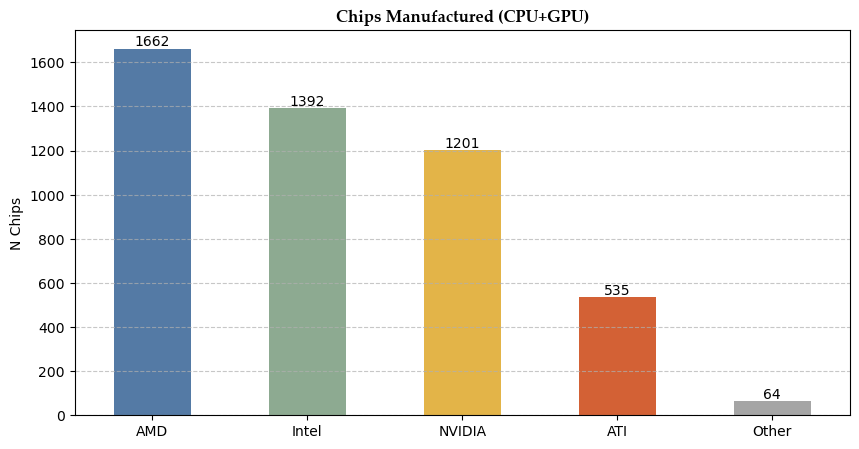

In [1020]:
chip_count = df_w['Vendor'].value_counts()

chart = chip_count.plot(kind='bar',
                        color = ['#547AA5','#8DAA91','#E3B448','#D36135','#A5A5A5'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Number of CPU Manufactured

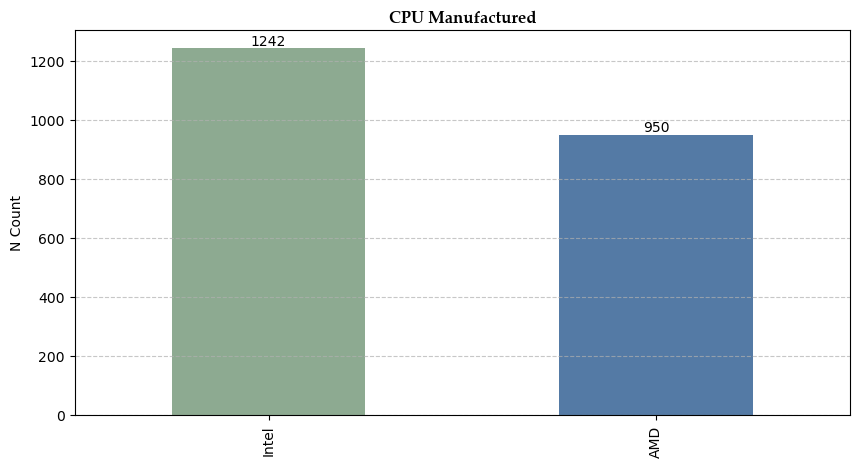

In [1021]:
cpu_count = df_w[df_w['Type'] == 'CPU']['Vendor'].value_counts()

chart = cpu_count.plot(kind='bar',
                       color = ['#8DAA91','#547AA5'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU Manufactured',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('N Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Number of GPU Manufactured

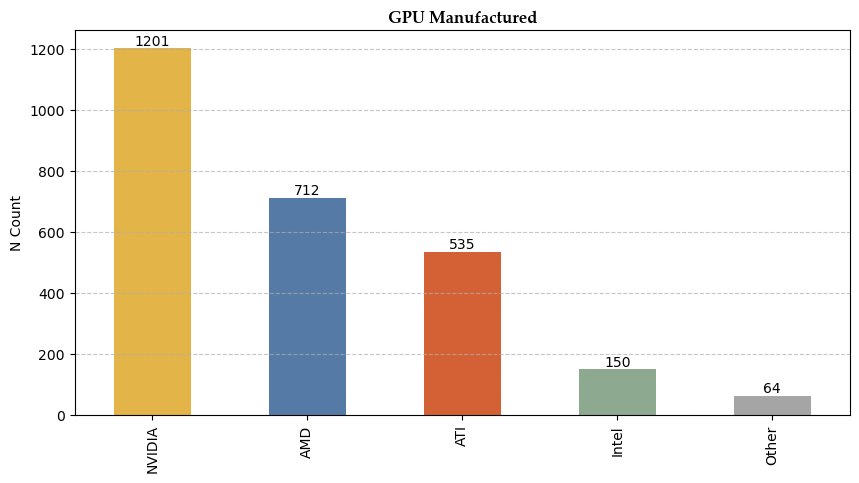

In [1022]:
gpu_count = df_w[df_w['Type'] == 'GPU']['Vendor'].value_counts()

chart = gpu_count.plot(kind='bar',
                       color = ['#E3B448','#547AA5','#D36135','#8DAA91','#A5A5A5'], 
                       figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('GPU Manufactured',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('N Count')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# CPU & GPU Process Size Trend

## ~ CPU Process Size Trend ~

In [1023]:
df_cpu_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cpu_ps 

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [1024]:
df_cpu_ps['Date'] = pd.to_datetime(df_cpu_ps['Date'])
df_cpu_ps['Year'] = df_cpu_ps['Date'].dt.year
df_cpu_ps 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [1025]:
df_cpu_ps = df_cpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_cpu_ps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


## ~ GPU Process Size Trend ~

In [1026]:
df_gpu_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_gpu_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [1027]:
df_gpu_ps['Date'] = pd.to_datetime(df_gpu_ps['Date'])
df_gpu_ps['Year'] = df_gpu_ps['Date'].dt.year
df_gpu_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [1028]:
df_gpu_ps = df_gpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_gpu_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


# CPU & GPU Process Size Trend Comparison 

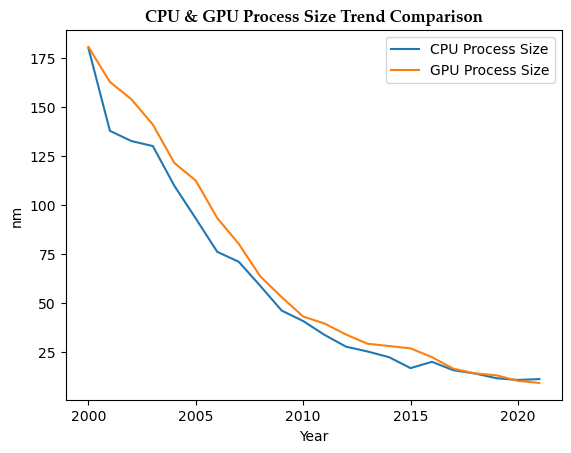

In [1029]:
plt.plot(df_cpu_ps['Year'], df_cpu_ps['Process_Size'], color='#1F77B4', label='CPU Process Size')
plt.plot(df_gpu_ps['Year'], df_gpu_ps['Process_Size'], color='#FF7F0E', label='GPU Process Size')
plt.title('CPU & GPU Process Size Trend Comparison',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('nm')
plt.xlabel('Year')
plt.legend()
plt.show()

 **Both CPU and GPU process sizes have been steadily shrinking over time. Smaller process sizes generally result in faster and more energy-efficient processors, as electrical signals have shorter distances to travel, and power consumption is reduced.**

# CPU & GPU Lowest TDP (Thermal Design Power)

## ~ CPU Lowest TDP (Thermal Design Power) ~

In [1030]:
df_cpu_tdp = df_w[['Type','Product','TDP']].where(df_w['Type']=='CPU').dropna()
df_cpu_tdp

,Type,Product,TDP
0,CPU,AMD Athlon 64 3500+,45.0
1,CPU,AMD Athlon 200GE,35.0
2,CPU,Intel Core i5-1145G7,28.0
3,CPU,Intel Xeon E5-2603 v2,80.0
4,CPU,AMD Phenom II X4 980 BE,125.0
...,...,...,...
2187,CPU,Intel Xeon Gold 6312U,185.0
2188,CPU,AMD Ryzen 9 4900H,54.0
2189,CPU,Intel Core 2 Duo E6550,65.0
2190,CPU,AMD Opteron 246,85.0


In [1031]:
df_cpu_tdp = df_cpu_tdp.sort_values(by='TDP')
df_cpu_tdp

,Type,Product,TDP
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0
1964,CPU,Intel Atom Z600,1.0
1761,CPU,Intel Atom Z610,1.0
2175,CPU,Intel Atom Z612,1.0
...,...,...,...
1847,CPU,Intel Aubrey Isle,300.0
535,CPU,Intel Xeon Phi 7295,320.0
1275,CPU,Intel Xeon Platinum 9242,350.0
2026,CPU,Intel Core i9-10990XE,380.0


In [1032]:
df_cpu_tdp = df_cpu_tdp.head(10)
df_cpu_tdp

,Type,Product,TDP
1550,CPU,Intel Atom Z500,1.0
469,CPU,Intel Atom Z620,1.0
1964,CPU,Intel Atom Z600,1.0
1761,CPU,Intel Atom Z610,1.0
2175,CPU,Intel Atom Z612,1.0
60,CPU,Intel Atom Z515,1.0
1802,CPU,Intel Atom Z615,2.0
1977,CPU,Intel Atom Z520PT,2.0
1877,CPU,Intel Atom Z510P,2.0
682,CPU,Intel Atom Z550,2.0


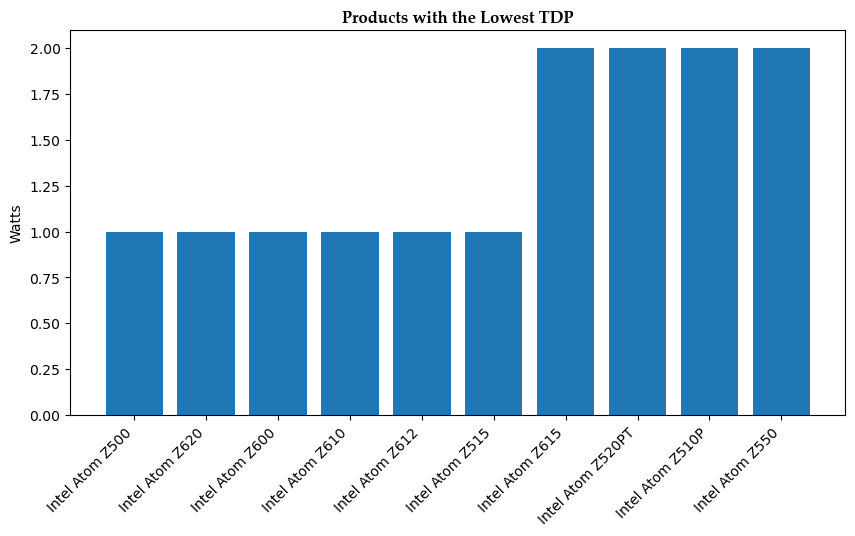

In [1033]:
plt.figure(figsize=(10,5))
plt.bar(df_cpu_tdp['Product'],df_cpu_tdp['TDP'], color = '#1F77B4')
plt.title('Products with the Lowest TDP',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## ~ GPU Loswest TDP (Thermal Design Power) ~

In [1034]:
df_gpu_tdp = df_w[['Type','Product','TDP']].where(df_w['Type']=='GPU').dropna()
df_gpu_tdp

,Type,Product,TDP
2192,GPU,Intel Xeon E3-1275,95.000000
2193,GPU,Matrox Parhelia 128 MB,81.359981
2194,GPU,NVIDIA GeForce MX150 GP107,25.000000
2195,GPU,Intel GMA 500,81.359981
2196,GPU,ATI Radeon HD 4350 AGP,20.000000
...,...,...,...
4849,GPU,NVIDIA Quadro 3000M,75.000000
4850,GPU,Intel GMA 950,7.000000
4851,GPU,NVIDIA GeForce GT 320M,23.000000
4852,GPU,NVIDIA GeForce FX 5200,81.359981


In [1035]:
df_gpu_tdp = df_gpu_tdp.sort_values(by='TDP')
df_gpu_tdp

,Type,Product,TDP
2866,GPU,NVIDIA GeForce2 Go 200,2.0
3101,GPU,NVIDIA GeForce2 Go,2.0
3480,GPU,NVIDIA GeForce2 Go 100,2.0
3019,GPU,NVIDIA GeForce2 Go,2.0
2769,GPU,Intel HD Graphics 4200,4.0
...,...,...,...
4735,GPU,NVIDIA Quadro Plex 2200 D2,640.0
3603,GPU,NVIDIA Tesla S1070,800.0
4064,GPU,NVIDIA Tesla S870,800.0
2908,GPU,NVIDIA Tesla S1075,800.0


In [1036]:
df_gpu_tdp = df_gpu_tdp.head(10)
df_gpu_tdp

,Type,Product,TDP
2866,GPU,NVIDIA GeForce2 Go 200,2.0
3101,GPU,NVIDIA GeForce2 Go,2.0
3480,GPU,NVIDIA GeForce2 Go 100,2.0
3019,GPU,NVIDIA GeForce2 Go,2.0
2769,GPU,Intel HD Graphics 4200,4.0
2381,GPU,Sony Playstation Portable GPU 90nm,4.0
3462,GPU,AMD Radeon HD 8180 IGP,4.0
2677,GPU,Sony Playstation Portable GPU 65nm,4.0
3184,GPU,Intel HD Graphics,4.0
3188,GPU,Sony Playstation Vita GPU,4.0


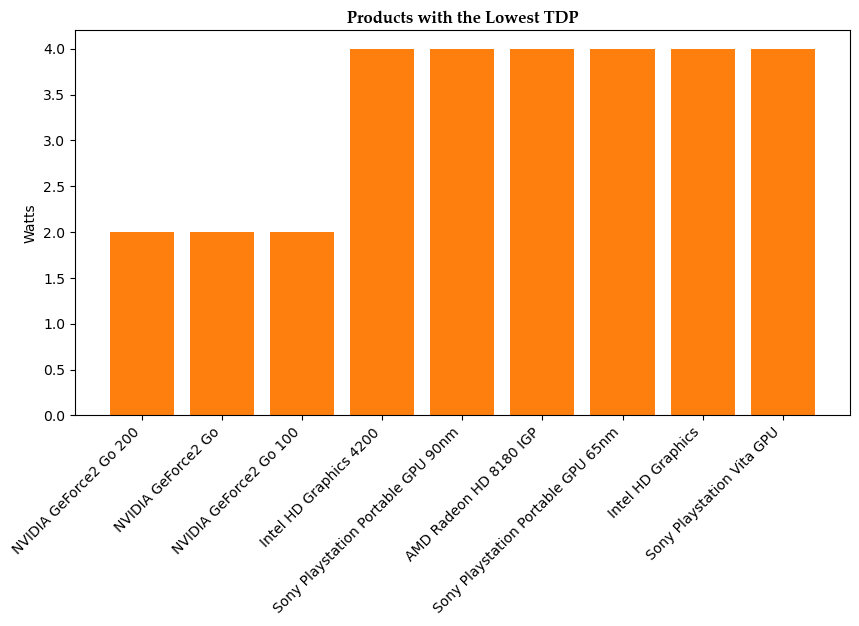

In [1037]:
plt.figure(figsize=(10,5))
plt.bar(df_gpu_tdp['Product'],df_gpu_tdp['TDP'], color = '#FF7F0E')
plt.title('Products with the Lowest TDP',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

# CPU & GPU Die Size Trend

## ~ CPU Die Size Trend ~

In [1038]:
df_cpu_ds= df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_cpu_ds

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [1039]:
df_cpu_ds['Date'] = pd.to_datetime(df_cpu_ds['Date'])
df_cpu_ds['Year'] = df_cpu_ds['Date'].dt.year
df_cpu_ds

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [1040]:
df_cpu_ds = df_cpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_cpu_ds

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


## ~ GPU Die Size Trend ~

In [1041]:
df_gpu_ds = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_gpu_ds

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [1042]:
df_gpu_ds['Date'] = pd.to_datetime(df_gpu_ds['Date'])
df_gpu_ds['Year'] = df_gpu_ds['Date'].dt.year
df_gpu_ds

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [1043]:
df_gpu_ds = df_gpu_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_gpu_ds

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


# CPU & GPU Die Size Trend Comparison

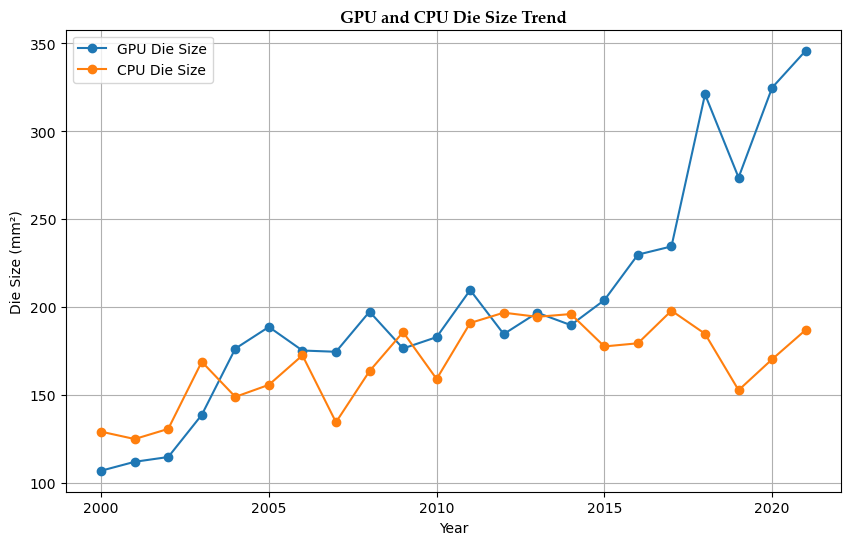

In [1044]:
plt.figure(figsize=(10, 6))
plt.plot(df_gpu_ds['Year'], df_gpu_ds['Die_Size'], color='#1F77B4', marker='o', label='GPU Die Size')
plt.plot(df_cpu_ds['Year'], df_cpu_ds['Die_Size'], color='#FF7F0E', marker='o', label='CPU Die Size')

plt.title('GPU and CPU Die Size Trend',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Die Size (mm²)')
plt.legend()
plt.grid(True)
plt.show()

**The die sizes for both CPUs and GPUs have been trending downward. Smaller die sizes can lower manufacturing costs and increase yield rates. Additionally, this trend reflects technological progress in fitting more transistors into a smaller space, which can lead to improved performance.**

# CPU & GPU Transitor Count Trend

## ~ CPU Transistors Count Trend ~

In [1045]:
df_cpu_tr= df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
df_cpu_tr

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [1046]:
df_cpu_tr['Date'] = pd.to_datetime(df_cpu_tr['Date'])
df_cpu_tr['Year'] = df_cpu_tr['Date'].dt.year
df_cpu_tr

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [1047]:
df_cpu_tr = df_cpu_tr.groupby('Year')['Transistors'].mean().reset_index()
df_cpu_tr

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


## ~ GPU Transistors Count Trend ~

In [1048]:
df_gpu_tr= df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_gpu_tr

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [1049]:
df_gpu_tr['Date'] = pd.to_datetime(df_gpu_tr['Date'])
df_gpu_tr['Year'] = df_gpu_tr['Date'].dt.year
df_gpu_tr

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [1050]:
df_gpu_tr = df_gpu_tr.groupby('Year')['Transistors'].mean().reset_index()
df_gpu_tr

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


# CPU & GPU Transistor Count Comparison

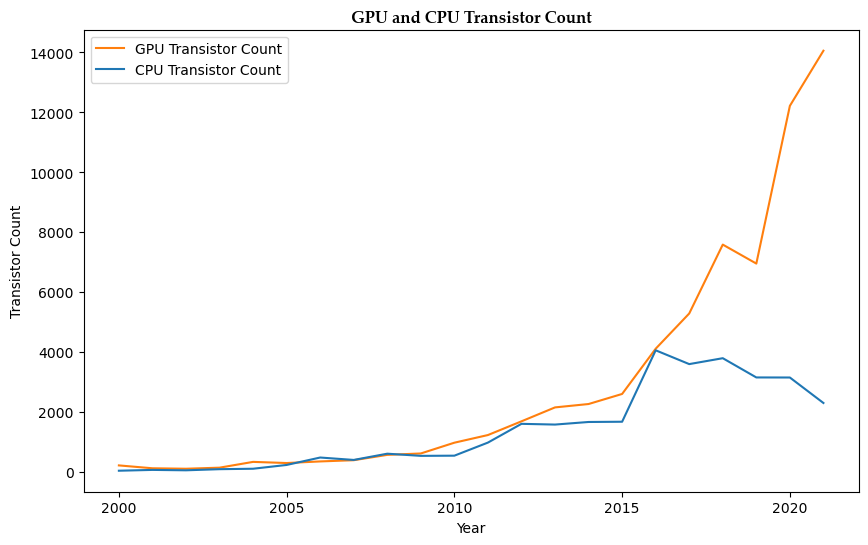

In [1051]:
plt.figure(figsize=(10, 6))
plt.plot(df_gpu_tr['Year'], df_gpu_tr['Transistors'], color='#FF7F0E', label='GPU Transistor Count')
plt.plot(df_cpu_tr['Year'], df_cpu_tr['Transistors'], color='#1F77B4', label='CPU Transistor Count')
plt.title('GPU and CPU Transistor Count',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Transistor Count')
plt.xlabel('Year')
plt.legend()
plt.show()

**The graph suggests GPUs have outpaced CPUs in transistor growth, especially after 2010, due to rising AI and gaming demands. CPUs show slower growth, possibly hitting scaling limits. GPUs benefit more from Moore’s Law, while CPUs rely on architecture improvements rather than just increasing transistor counts.**

# CPU & GPU Frenquency Trend

## ~ CPU Frequency Trend ~

In [1052]:
df_cpu_fr= df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
df_cpu_fr

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [1053]:
df_cpu_fr['Date'] = pd.to_datetime(df_cpu_fr['Date'])
df_cpu_fr['Year'] = df_cpu_fr['Date'].dt.year
df_cpu_fr

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [1054]:
df_cpu_fr = df_cpu_fr.groupby('Year')['Frequency'].mean().reset_index()
df_cpu_fr

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


## ~ GPU Frequency Trend ~

In [1055]:
df_gpu_fr= df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_gpu_fr

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [1056]:
df_gpu_fr['Date'] = pd.to_datetime(df_gpu_fr['Date'])
df_gpu_fr['Year'] = df_gpu_fr['Date'].dt.year
df_gpu_fr

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [1057]:
df_gpu_fr = df_gpu_fr.groupby('Year')['Frequency'].mean().reset_index()
df_gpu_fr

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


# CPU & GPU Frequency Comparison

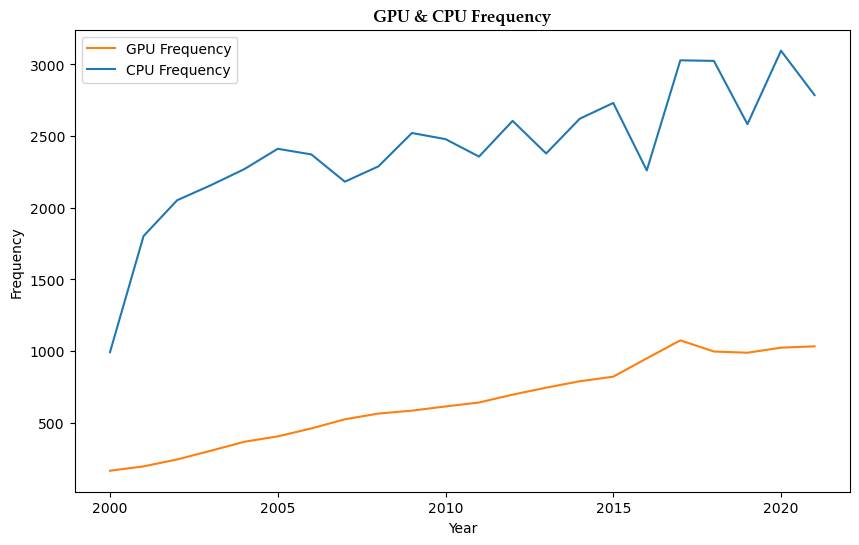

In [1058]:
plt.figure(figsize=(10, 6))
plt.plot(df_gpu_fr['Year'], df_gpu_fr['Frequency'], color='#FF7F0E', label='GPU Frequency')
plt.plot(df_cpu_fr['Year'], df_cpu_fr['Frequency'], color='#1F77B4', label='CPU Frequency')
plt.title('GPU & CPU Frequency',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Frequency')
plt.xlabel('Year')
plt.legend()
plt.show()

**CPU frequencies increased rapidly in the early 2000s but plateaued after 2010, while GPU frequencies have steadily increased over time. This suggests that CPUs hit a performance limit relying on higher clock speeds, whereas GPUs continued improving due to parallel computing and architectural advancements.**

# Average Frequency per Manufacturer Comparison

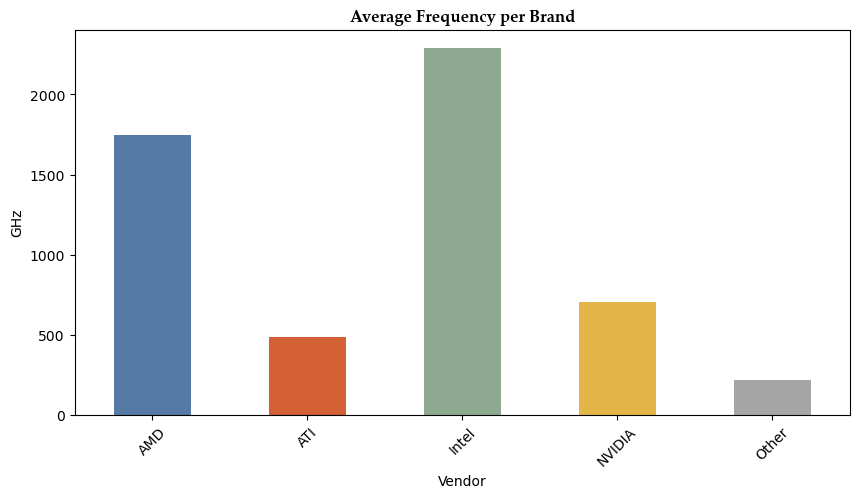

In [1059]:
plt.figure(figsize=(10,5))
df_w.groupby('Vendor')['Frequency'].mean().plot(kind='bar', color=['#547AA5','#D36135','#8DAA91','#E3B448','#A5A5A5'])
plt.title("Average Frequency per Brand",
           fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel("GHz")
plt.xticks(rotation=45)
plt.show()

**Some manufacturers focus on achieving higher clock speeds to enhance performance. Among them, Intel demonstrates the highest frequencies, followed closely by AMD.**